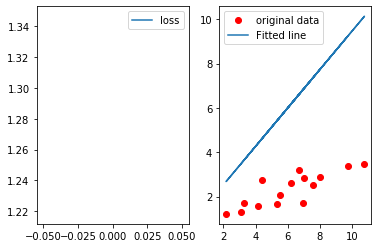

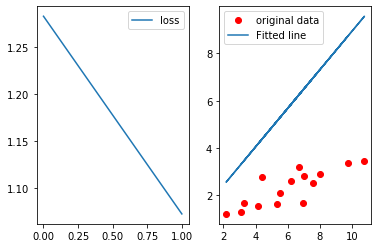

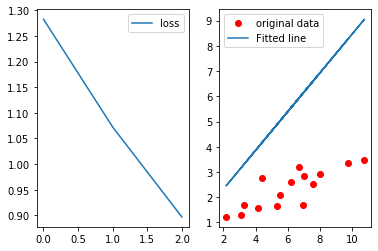

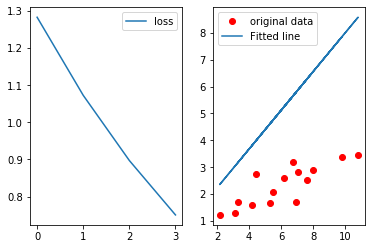

Epoch[5/100], loss: 9.4236


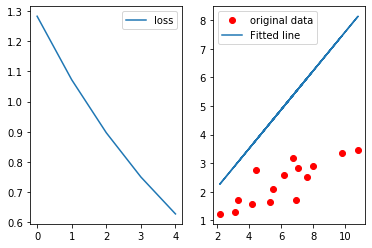

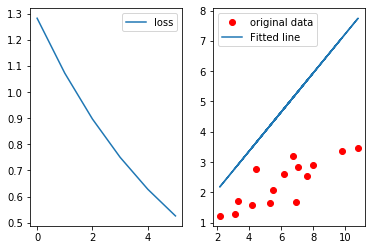

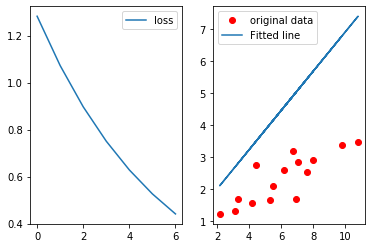

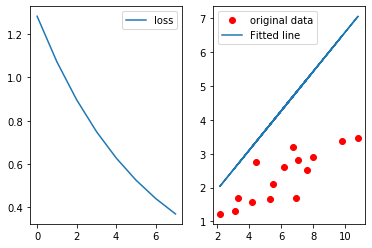

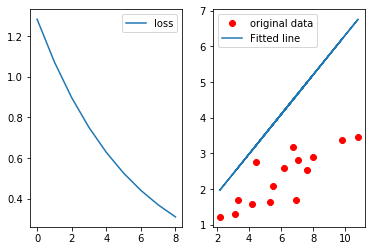

Epoch[10/100], loss: 3.9182


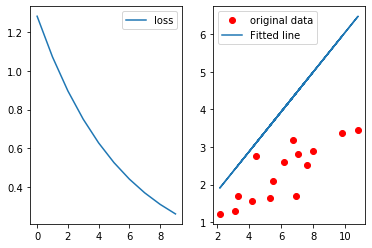

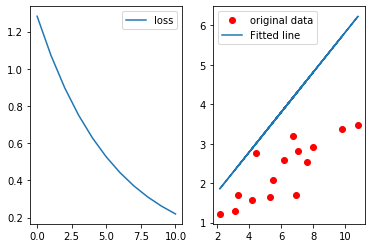

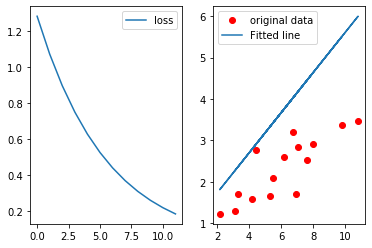

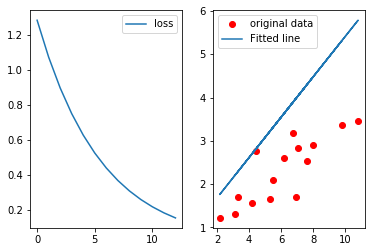

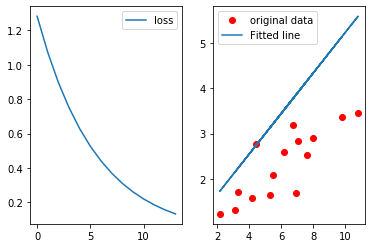

Epoch[15/100], loss: 1.6879


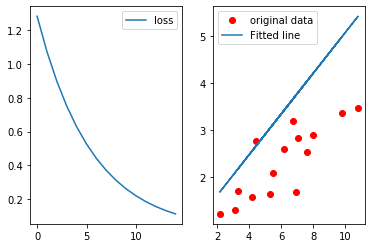

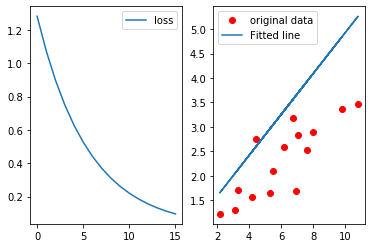

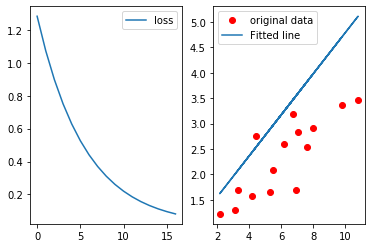

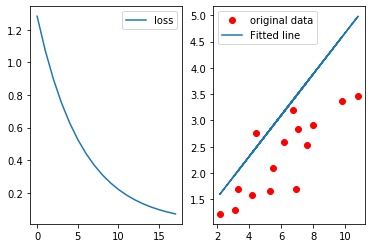

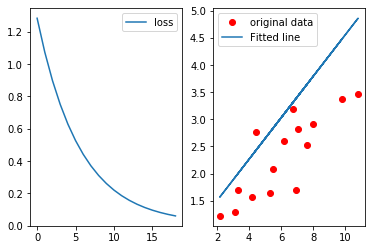

Epoch[20/100], loss: 0.7843


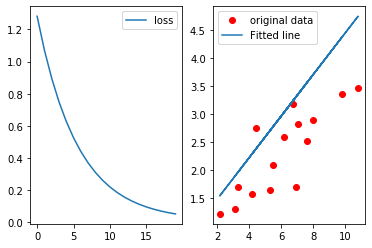

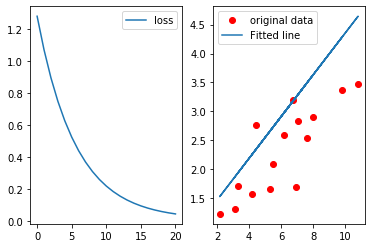

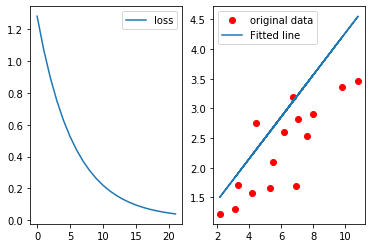

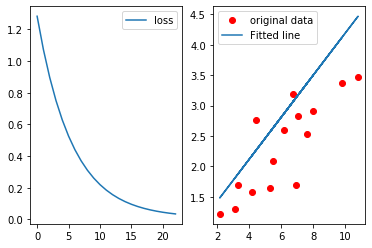

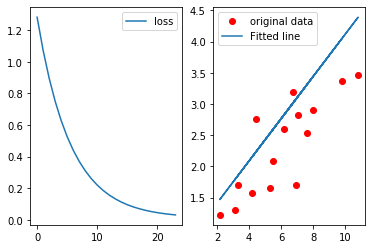

Epoch[25/100], loss: 0.4183


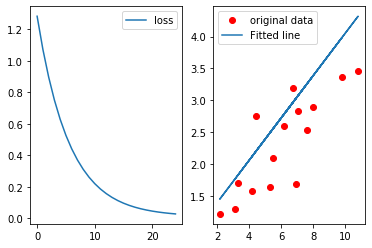

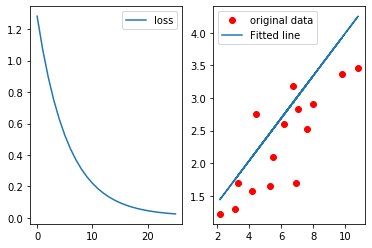

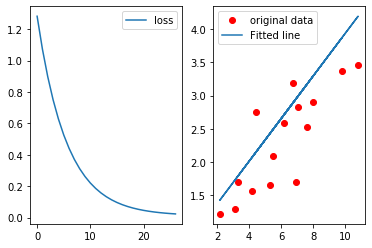

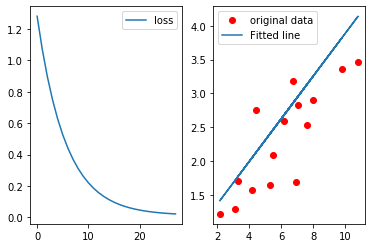

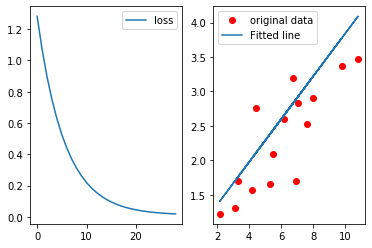

Epoch[30/100], loss: 0.2700


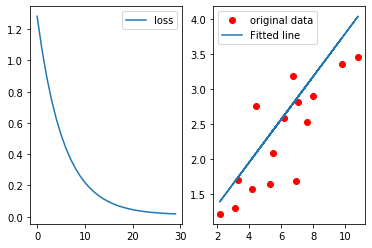

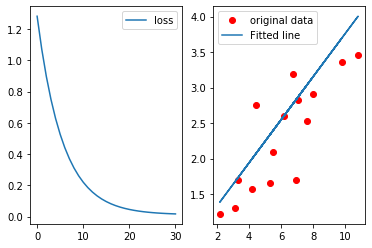

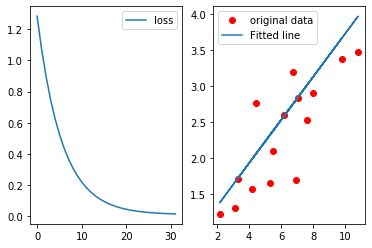

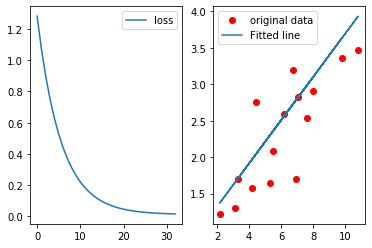

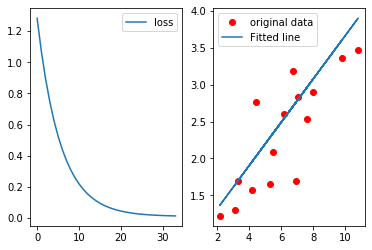

Epoch[35/100], loss: 0.2099


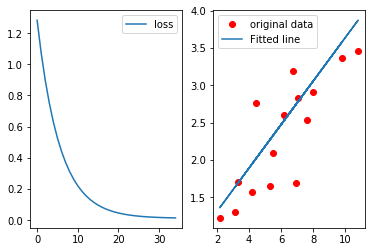

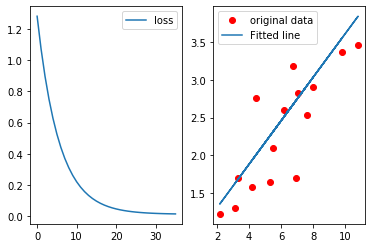

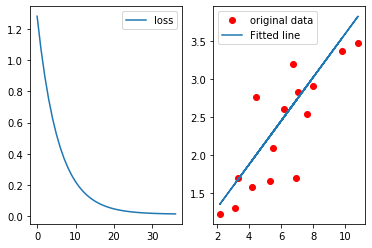

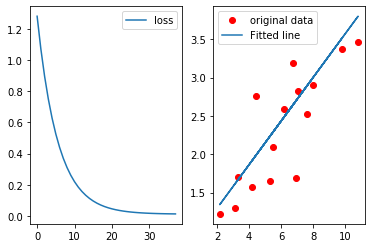

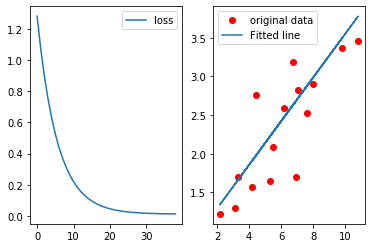

Epoch[40/100], loss: 0.1856


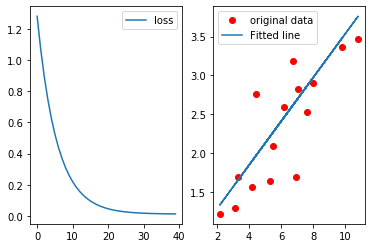

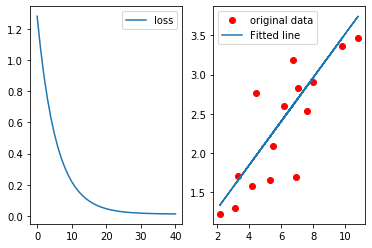

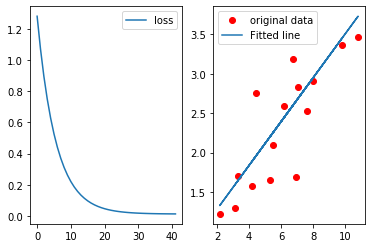

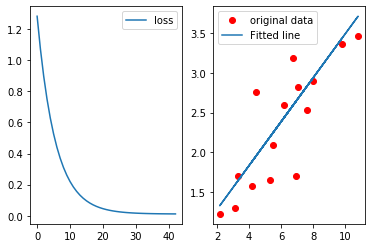

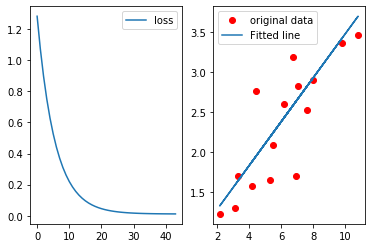

Epoch[45/100], loss: 0.1757


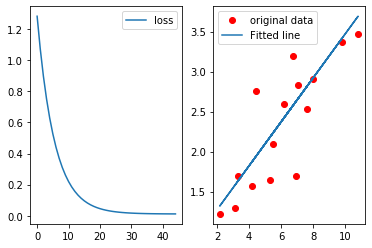

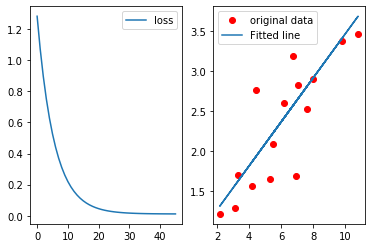

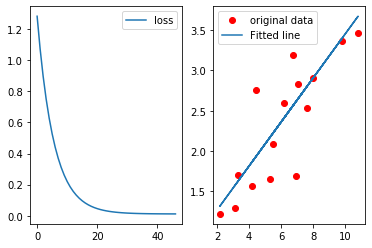

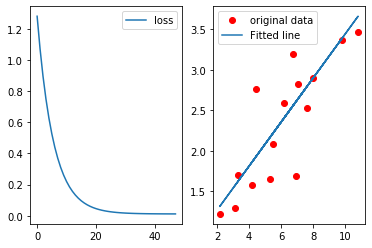

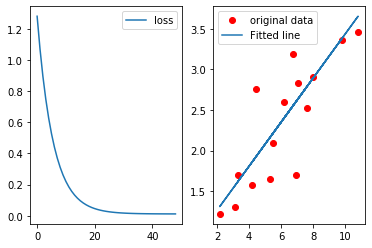

Epoch[50/100], loss: 0.1717


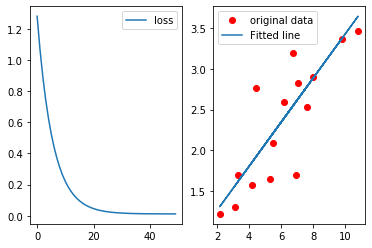

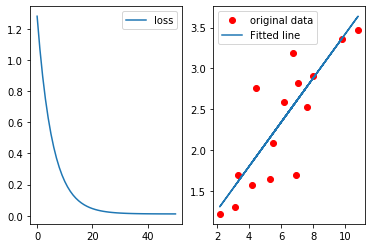

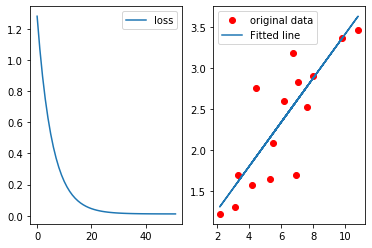

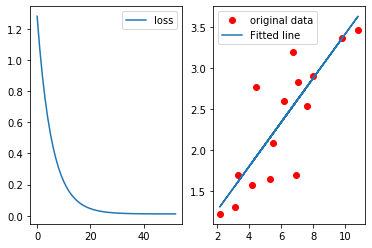

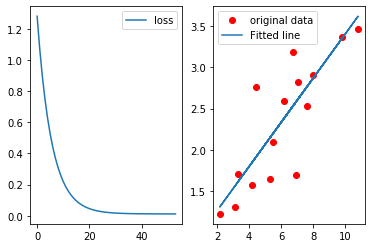

Epoch[55/100], loss: 0.1701


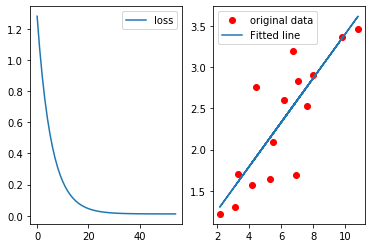

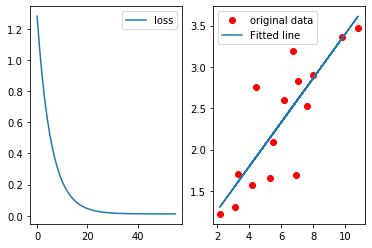

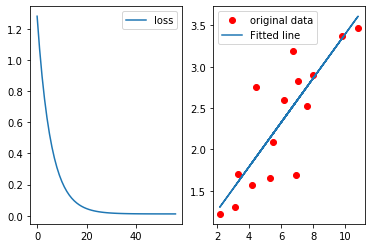

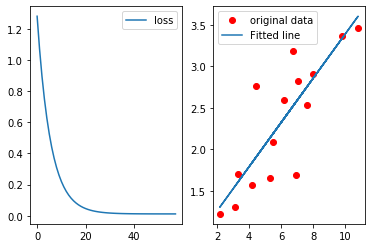

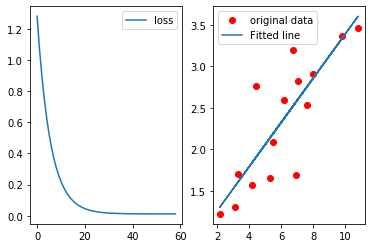

Epoch[60/100], loss: 0.1694


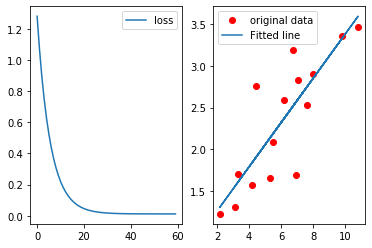

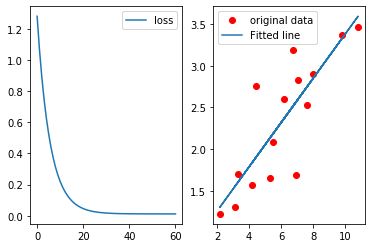

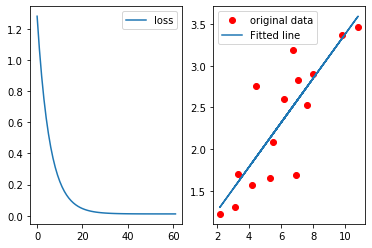

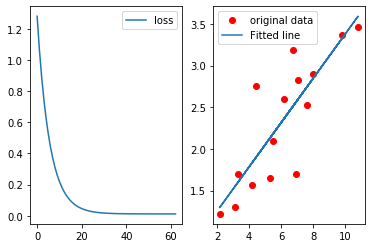

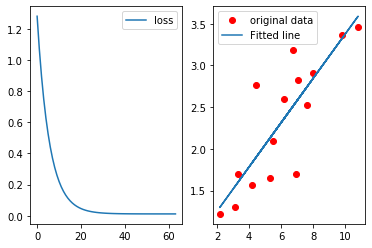

Epoch[65/100], loss: 0.1692


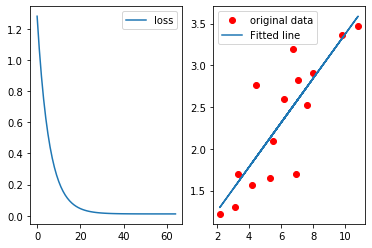

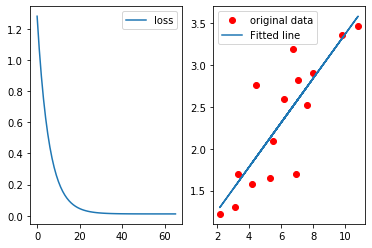

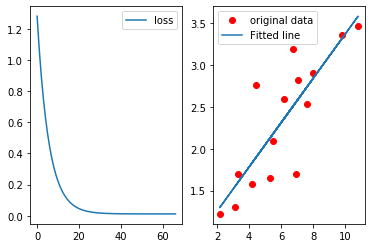

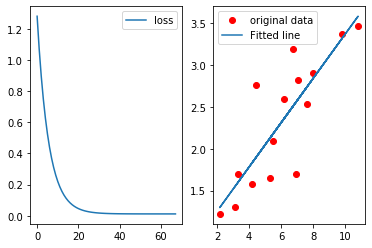

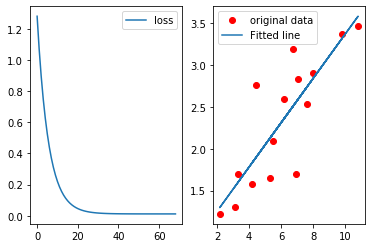

Epoch[70/100], loss: 0.1691


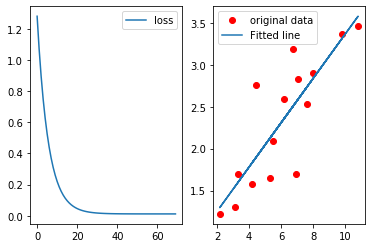

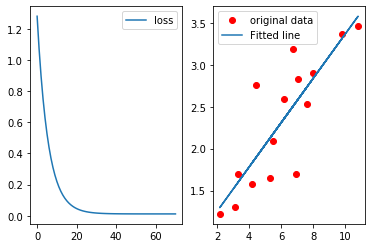

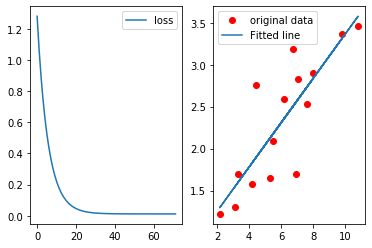

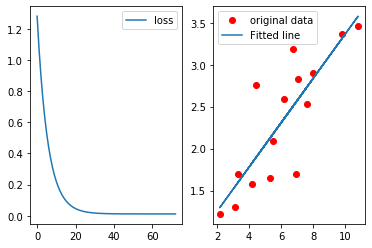

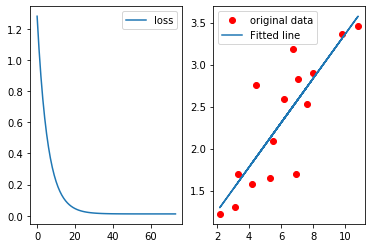

Epoch[75/100], loss: 0.1690


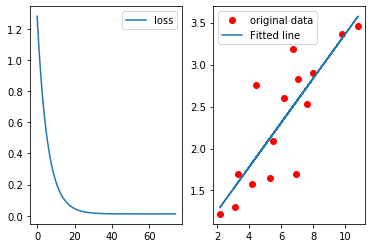

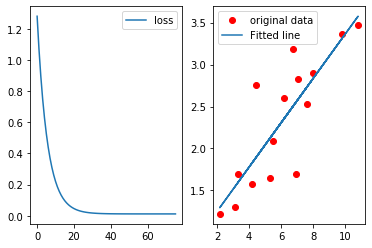

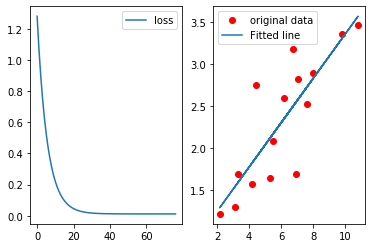

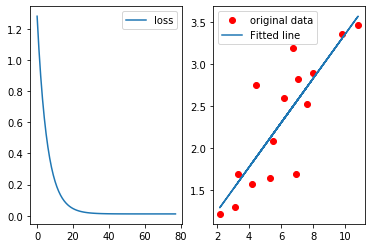

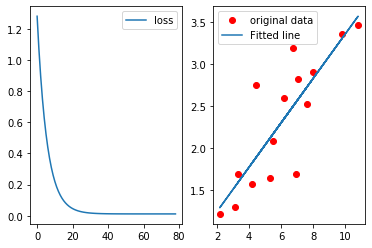

Epoch[80/100], loss: 0.1690


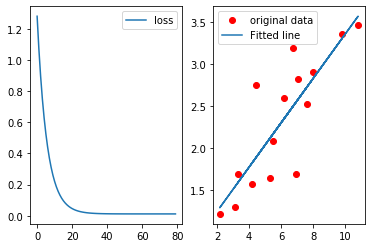

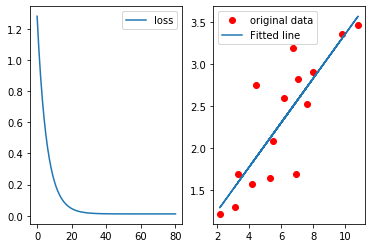

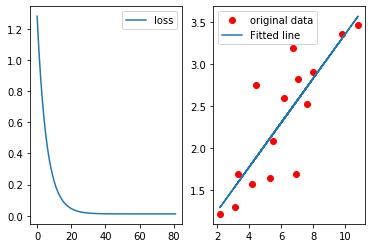

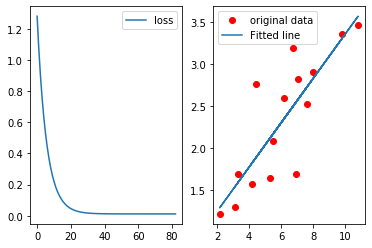

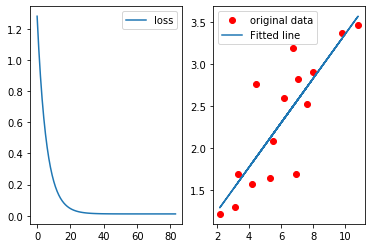

Epoch[85/100], loss: 0.1690


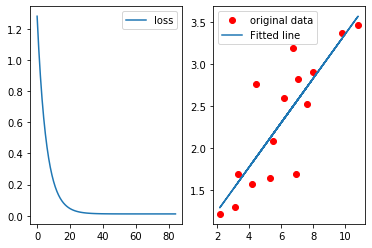

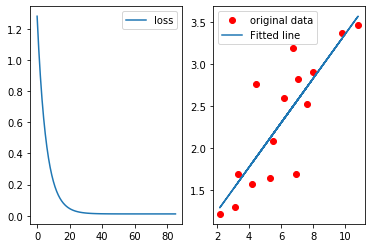

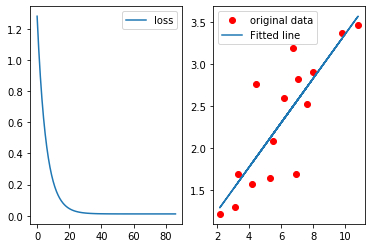

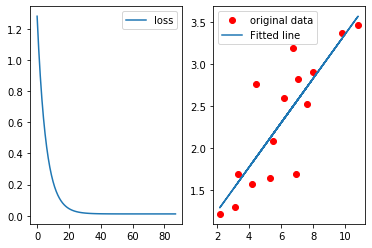

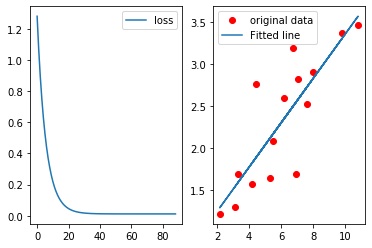

Epoch[90/100], loss: 0.1690


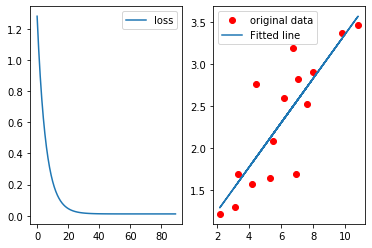

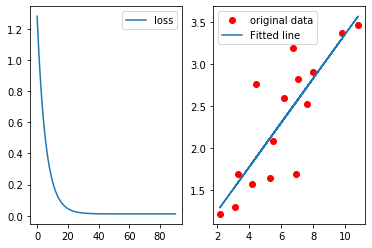

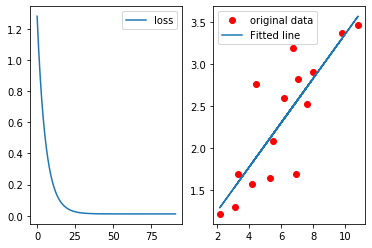

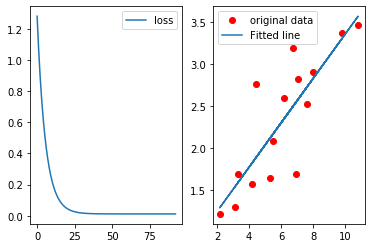

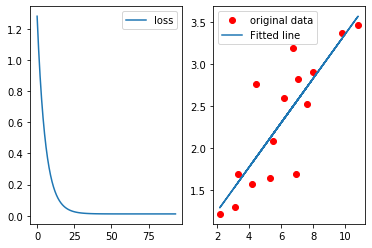

Epoch[95/100], loss: 0.1690


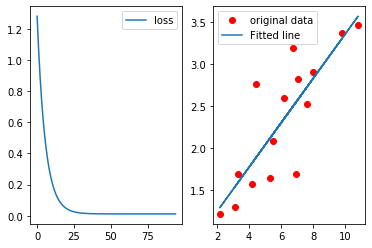

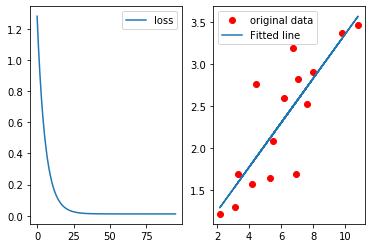

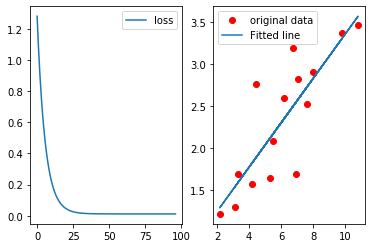

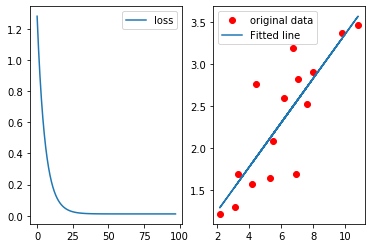

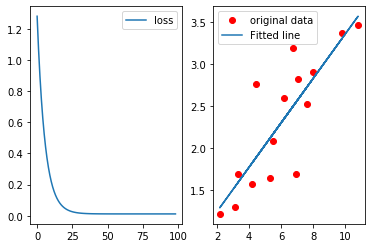

Epoch[100/100], loss: 0.1690


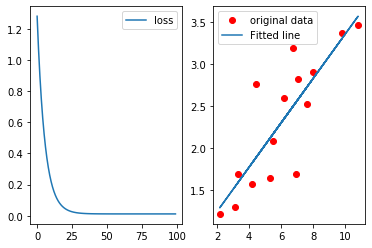

In [5]:
#  Linear Regression with PyTorch
import torch
import torch.nn as nn  #包含神经网络操作的工具包
import numpy as np    # 数学计算库
import matplotlib.pyplot as plt  #类似matlab的绘图函数

# 超参数设置
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.001

# 输入数据， 使用np创建数组
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# 线性回归模型：对输入数据作线性变换，参数是输入输出数据的大小
model  = nn.Linear(input_size, output_size)

# loss: 均方误差损失
criterion = nn.MSELoss()

# 优化器
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

losses = []

# numpy array -> torch tensor
inputs = torch.from_numpy(x_train)
targets = torch.from_numpy(y_train)

# 训练模型
for epoch in range(num_epochs):
    train_loss = 0
    
    # 前向传播， 对定义的线性模型， 添加数据进行训练
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # 反向传播加优化
    optimizer.zero_grad()
    loss.backward() # loss 进行反向传播
    optimizer.step()
    
    # 保存loss值，画loss 曲线
    train_loss += loss.item() #item()获得Tensor的元素，loss是一个张量
    losses.append(train_loss / len(x_train))
    
    # epoch 从0开始计数，每训练5个打印一次
    if (epoch + 1) % 5 == 0:
        print('Epoch[{}/{}], loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))
    
    # 画 loss 曲线和回归曲线
    predicted  = model(inputs).detach().numpy() #detach 分离出一个新的tensor, 使之对原计算图没有影响， 不然等于在原计算图中加入新的节点
    
    fig = plt.figure() #创建一个figure
    
    fig.add_subplot(121) #添加子图
    plt.plot(np.arange(len(losses)), losses, label= 'loss') #np.arange(len(losses))刻度不是固定的???
    plt.legend() #创建图例
    
    fig.add_subplot(122)
    plt.plot(x_train, y_train, 'ro', label= 'original data')
    plt.plot(x_train, predicted, label='Fitted line')
    
    plt.legend()
    plt.show()
    
    #  保存模型的状态字典到一个路径
    torch.save(model.state_dict(), 'linear_regression_model.pt')
    
                

